In [ ]:
!pip install netCDF4
!pip install datasets

In [ ]:
import pandas as pd
import numpy as np
import datasets
import transformers

feedback = pd.read_csv("External_data.csv", encoding ="latin-1")

feedback.head(5)

,label,text
0,1,theoretisch kannste dir Ã¼berall im KÃ¶lner St...
1,0,Bahn verspÃ¤tet sich..gleich kommt noch jemand...
2,0,"""Mama, der bei der Bahn war so inkompetent, ha..."
3,0,Re: StÃ¶rticker Bayern [S-Bahn M] Stammstrecke...
4,0,LokfÃ¼hrerstreik geht weiter: Wieder viele Zug...


In [ ]:
import nltk
nltk.download('stopwords')

def _removeNonAscii(s):
    return "".join(i for i in s if ord(i)<128)

def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("german"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = "".join(text)
    return text

def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"
        u"\u3030"
        "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

from nltk.tokenize import RegexpTokenizer
import re

feedback = feedback.astype(str)

feedback['text'] = feedback['text'].apply(_removeNonAscii)
feedback['text'] = feedback.text.apply(func = remove_stop_words)
feedback['text'] = feedback.text.apply(func=remove_emojis)
feedback['text'] = feedback.text.apply(func=remove_URL)

feedback.head(4)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,label,text
0,1,theoretisch kannste berall Klner Stadtbereich ...
1,0,Bahn versptet sich..gleich kommt jemand drckt ...
2,0,"""Mama, Bahn inkompetent, beim Rausgehen 5mal U..."
3,0,Re: Strticker Bayern [S-Bahn M] Stammstrecke: ...


<ipython-input-13-b49a66aa95db>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  feedback['text'] = feedback['text'].str.replace(url_pattern, '', flags=re.MULTILINE)
<ipython-input-13-b49a66aa95db>:32: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  feedback['text'] = feedback['text'].str.replace(char, '')


  label                                               text
0     1  theoretisch kannste berall klner stadtbereich ...
1     0  bahn versptet sichgleich kommt jemand drckt ri...
2     0  mama bahn inkompetent beim rausgehen 5mal unzu...


<ipython-input-13-b49a66aa95db>:40: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  feedback['text'] = feedback['text'].str.replace(char, '')


0    5228
1    1216
Name: label, dtype: int64

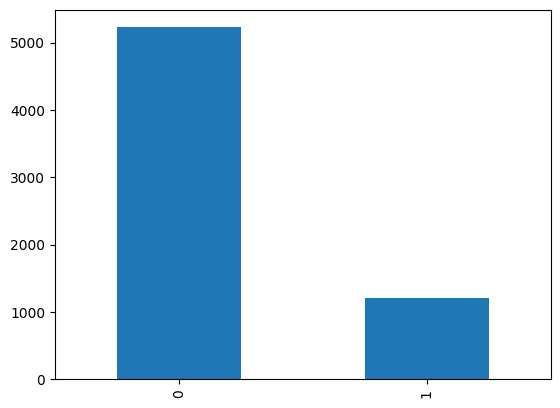

In [ ]:
from nltk.tokenize import RegexpTokenizer
import re
def make_lower_case(text):
    return text.lower()

feedback = feedback.astype(str)
feedback['text'] = feedback.text.apply(func = make_lower_case)
feedback.head(5)

feedback = feedback.replace('nan', np.nan) #we need to convert the strings to NaN values
feedback=feedback.dropna(subset=['text']) #we drop the rows with null values

feedback['text'] = feedback['text'].str.split().str.join(" ")
feedback.head(5)

import re

# Define a regular expression pattern to match URLs
url_pattern = r'https?://\S+|www\.\S+'

# Replace URLs with an empty string in the 'text' column of your DataFrame
feedback['text'] = feedback['text'].str.replace(url_pattern, '', flags=re.MULTILINE)

# Remove any extra whitespace
feedback['text'] = feedback['text'].str.strip()

spec_chars = ["!",'"',"#","%","&","'","(",")", #removed: "\\"
             "*","+",",","-",".",":",";","<",
             "=",">","?","@","[","]","^","_",
             "`","{","|","}","~","–"]
for char in spec_chars:
    feedback['text'] = feedback['text'].str.replace(char, '')

# Dropping those having installation ids
feedback = feedback[feedback["text"].str.contains("installation id") == False]
feedback.head(3)

spec_chars = ["\\"]
for char in spec_chars:
    feedback['text'] = feedback['text'].str.replace(char, '')
print(feedback.head(3))

from netCDF4 import Dataset
feedback.head(3)

feedback['label'].value_counts().plot(kind='bar')
feedback['label'].value_counts()

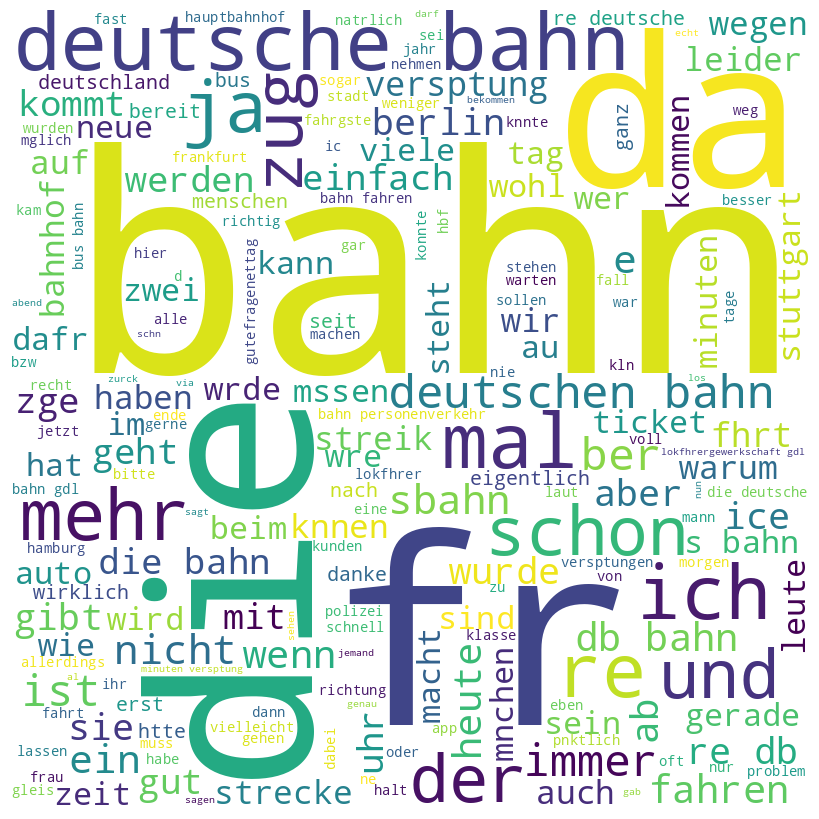

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
#df = pd.read_csv("External_data.csv", encoding ="latin-1")
feedback = feedback.rename(columns={'text': 'CONTENT'})
comment_words = ''
stopwords = set(STOPWORDS)

for val in feedback.CONTENT:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()